#Import

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import random
import string
import itertools

from keras import models
from keras.preprocessing import image

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Create variables

Create paths for dataset and models.

In [2]:
data_path = '/content/drive/MyDrive/Universidad/Deep_Learning/2nd_Midterm/dataset_predict'

root_path = '/content/drive/MyDrive/Universidad/Deep_Learning/Final_Project'

data_path = root_path + '/Dataset'
test_path = data_path + '/Test'

model_TL_path = root_path + '/keras-models' + '/TL_Model.h5'
model_STL_path = root_path + '/keras-models' + '/STL_Model.h5'

Create dictionaries to point to solutions according to the model prediction.

In [3]:
classes = [char for char in string.ascii_uppercase if char != "J" if char != "Z"]
print(classes, end = " ")

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y'] 

#Load models

Load trained models.

In [4]:
model_TL = models.load_model(model_TL_path)
model_STL = models.load_model(model_STL_path)

#Predict

Create function to decode the prediction.

In [5]:
def evaluate(img_path,model,classes):
  img = image.load_img(img_path, target_size=(32, 32))
  img_array = image.img_to_array(img)
  img_batch = np.expand_dims(img_array, axis=0)
  prediction = model.predict(img_batch)
  index = np.where(prediction[0] == np.amax(prediction[0]))
  key = index[0][0]
  guess = classes[key]
  print('Prediction: '+guess)

Select random image and predict.

True: W


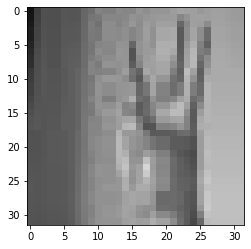

Prediction: A


In [6]:
folder_path = data_path+'/Test/'+random.choice(os.listdir(test_path))
img_path = folder_path + '/'+random.choice(os.listdir(folder_path))

print('True: '+folder_path[-1])

#Uncomment if you want to print the image
#
img = image.load_img(img_path, target_size=(32, 32))
plt.imshow(img)
plt.show()
#

evaluate(img_path,model_STL,classes)

Test with image taken from camera.

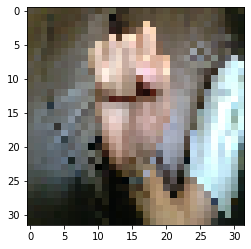

True: S
Prediction: G


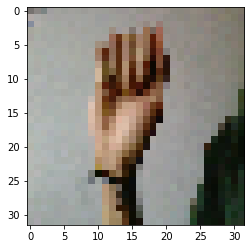

True: A
Prediction: M


In [9]:
img_path = '/content/drive/MyDrive/Universidad/Deep_Learning/Final_Project/'

path_s = img_path + 'Test_image_s.jpg'
path_a = img_path + 'Test_image_a.jpg'

#Uncomment if you want to print the image
#
img = image.load_img(path_s, target_size=(32, 32))
plt.imshow(img)
plt.show()
#

print('True: S')
evaluate(path_s,model_STL,classes)


#Uncomment if you want to print the image
#
img = image.load_img(path_a, target_size=(32, 32))
plt.imshow(img)
plt.show()
#
print('True: A')
evaluate(path_a,model_STL,classes)